<a href="https://colab.research.google.com/github/vivek-231/homework/blob/main/DecisionTree_with_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path="/content/drive/MyDrive/iris.csv"

In [4]:
df=pd.read_csv(file_path)

In [5]:
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [6]:
df.isnull()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [7]:
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [8]:
label_encoder=LabelEncoder()
df['Species']=label_encoder.fit_transform(df['Species'])
df['Species']

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [9]:
x=df.iloc[:,0:5]

In [10]:
x

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [12]:
y=df['Species']
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [13]:
y=df['Species'].unique()

In [25]:
y=df['Species']
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [26]:
colnames=list(df.columns)
colnames

['Unnamed: 0',
 'Sepal.Length',
 'Sepal.Width',
 'Petal.Length',
 'Petal.Width',
 'Species']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.6, 0.8333333333333334, 'x[0] <= 99.5\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.4, 0.5, 'x[3] <= 2.6\nentropy = 0.998\nsamples = 68\nvalue = [36, 32, 0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]'),
 Text(0.7, 0.6666666666666667, '  False')]

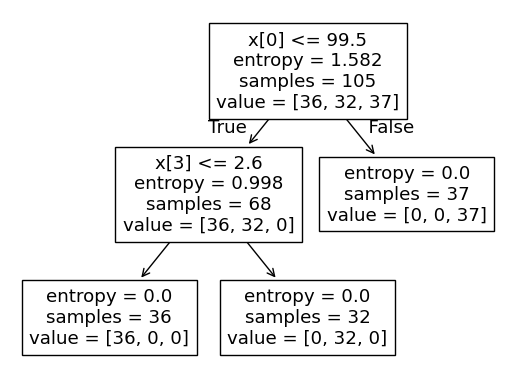

In [30]:
from sklearn import tree
tree.plot_tree(model)


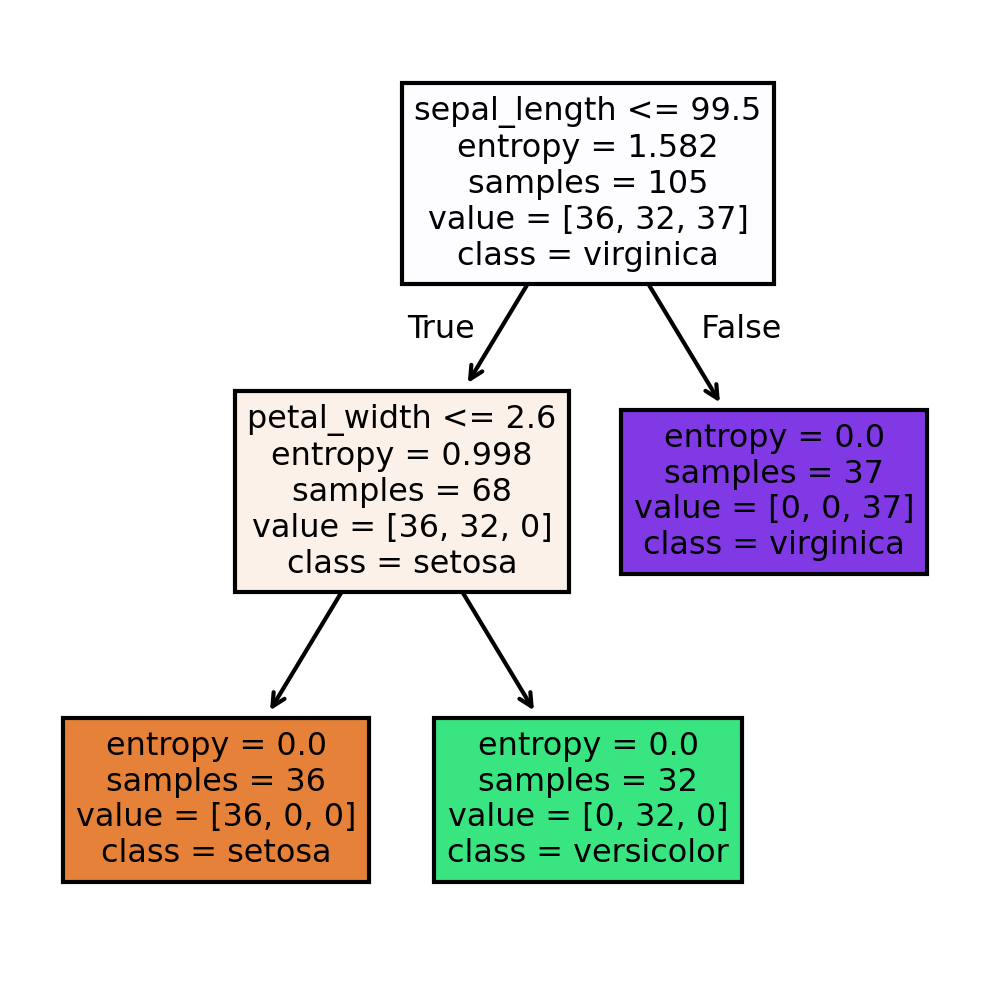

In [31]:
fn=['sepal_length','sepal_width','petal_length','petal_width']
cn=['setosa','versicolor','virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);